In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters
from numpy import reshape
from scipy import signal
import time
from skimage.filters import roberts, prewitt, sobel

import math

In [2]:
def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    # [1 1 1] [0 0 0] [-1 -1 -1]
    image_padded = np.pad(image, int(kernel.shape[0]/2), 'constant')
    output = np.zeros_like(image)
    for row in range(image.shape[0]):
        for column in range(image.shape[1]):
            output[row,column] = np.multiply(kernel, image_padded[row:row + kernel.shape[0], column:column + kernel.shape[0]]).sum()
    return output

In [3]:
def noisy(image):
    row,col= image.shape
    gauss = np.random.normal(0,0.1**0.5,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = image + gauss
    return noisy

## Question 1

> Values for cube : 50, 235

> Values for bell  : 57, 228

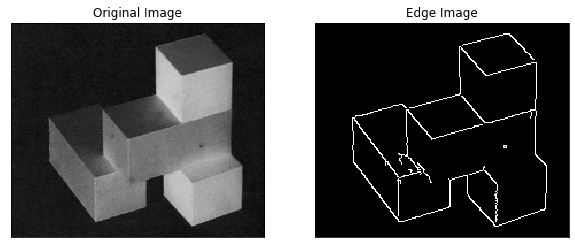

In [4]:
img1 = cv2.imread("./input_data/cubes.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("./input_data/bell.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
v = np.median(img2)

lower = int(max(0, (1.0 - 0.65) * v))
upper = int(min(255, (1.0 + 0.55) * v))

edges = cv2.Canny(img1,lower,upper)

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img1,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
v = np.median(img2)

lower = int(max(0, (1.0 - 0.6) * v))
upper = int(min(255, (1.0 + 0.6) * v))
edges = cv2.Canny(img2,lower,upper)

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
laplace = np.array([[0, 1, 0], 
                 [1, -4, 1], 
                 [0, 1, 0]])

laplace_diag = np.array([[1, 1, 1], 
                         [1, -8, 1], 
                         [1, 1, 1]])

prewitt_h = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]])

prewitt_v = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

roberts_h = np.array([[1, 0],
                    [0, -1]])

roberts_v = np.array([[0, 1],
                    [-1, 0]])

sobel_h = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

sobel_v = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])


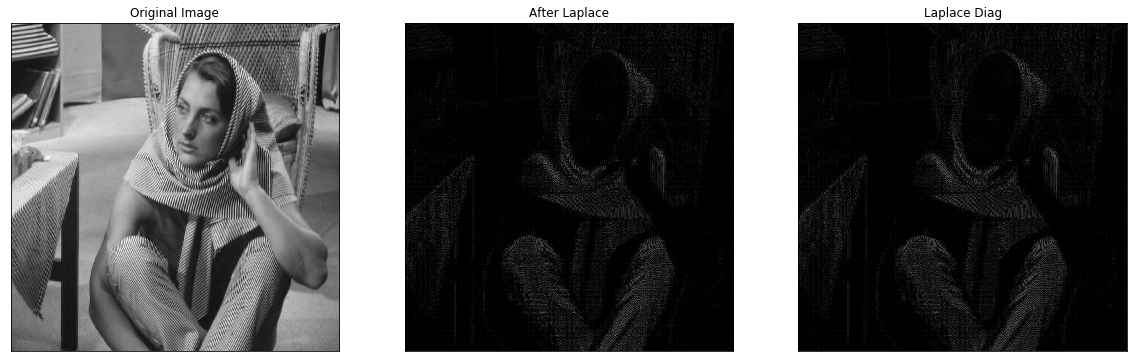

In [7]:
# Laplace Filter
image = cv2.imread("input_data/barbara.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

laplace = np.absolute(convolve2d(image.astype(np.float), laplace))
laplace_diag = np.absolute(convolve2d(image.astype(np.float), laplace_diag))

plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(laplace,cmap = 'gray')
plt.title('After Laplace'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(laplace_diag, cmap = 'gray')
plt.title('Laplace Diag'), plt.xticks([]), plt.yticks([])
plt.show()

[[293.   8.   8. ...  13.  37. 336.]
 [391.   8.   9. ...  12.  43. 459.]
 [405.   6.   9. ...   6.  33. 483.]
 ...
 [340.   8.  11. ...   0.   4. 416.]
 [344.   8.  12. ...   5.   7. 412.]
 [260.   6.   9. ...   7.   6. 307.]]


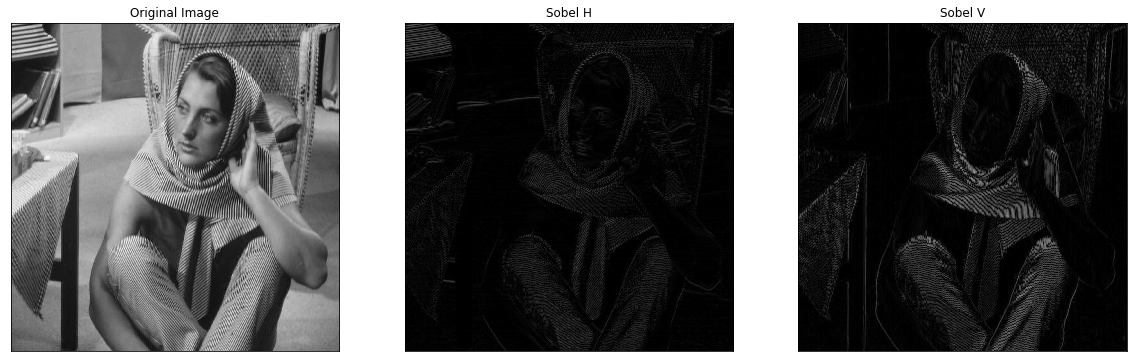

In [8]:
#sobel
sobel_h = np.absolute(convolve2d(image.astype(np.float), sobel_h))
sobel_v = np.absolute(convolve2d(image.astype(np.float), sobel_v))
print(sobel_v)
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(sobel_h,cmap = 'gray')
plt.title('Sobel H'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(sobel_v,cmap = 'gray')
plt.title('Sobel V'), plt.xticks([]), plt.yticks([])
plt.show()

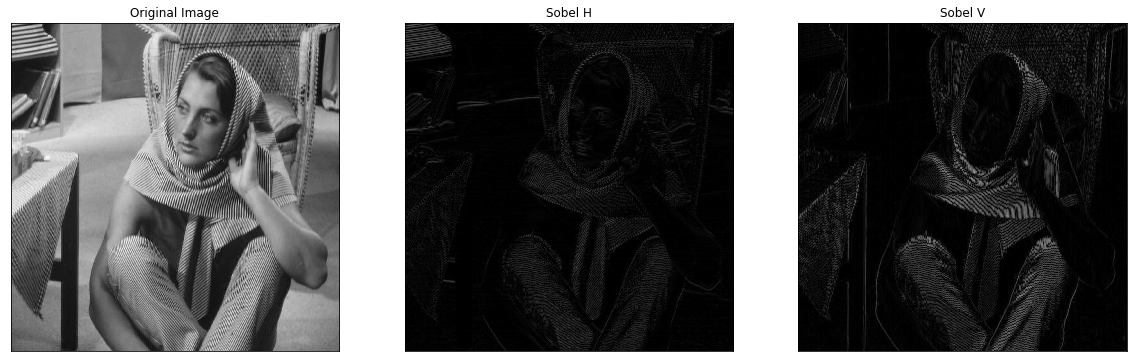

In [9]:
#prewitt

prewitt_h = np.absolute(convolve2d(image.astype(np.float), prewitt_h))
prewitt_v = np.absolute(convolve2d(image.astype(np.float), prewitt_v))

plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(sobel_h,cmap = 'gray')
plt.title('Sobel H'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(sobel_v,cmap = 'gray')
plt.title('Sobel V'), plt.xticks([]), plt.yticks([])
plt.show()

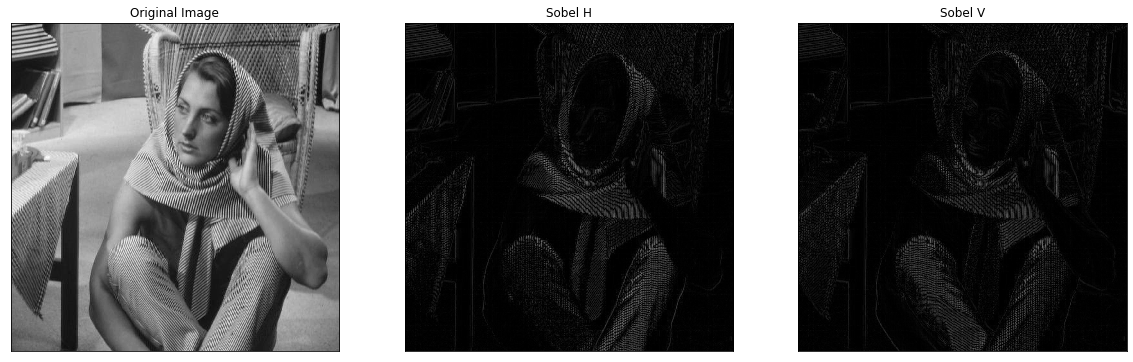

In [10]:
# Robert

robert_h = np.absolute(convolve2d(image.astype(np.float), roberts_h))
robert_v = np.absolute(convolve2d(image.astype(np.float), roberts_v))

plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(robert_h,cmap = 'gray')
plt.title('Sobel H'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(robert_v,cmap = 'gray')
plt.title('Sobel V'), plt.xticks([]), plt.yticks([])
plt.show()


# Observations
#### Laplacian Filter


Captures sharp intensity changes and not gradients but also, captures all the edges. It is a second order derivative function.

#### Diagonal Laplacian Filter

Captures edges that are not just strictly vertical or horizontal. Better than Laplace filter.

#### Horizontal Prewitt Filter

Detects drastic intensity changes in the vertical direction (Horizontal edges). Thus, lips, eyebrows etc. and other horizontal outlines are emphasized.

#### Vertical Prewitt Filter

Detects drastic intensity changes in the horizonatal direction (Vertical edges). The nose, gradients across the face, leg of table is clearer.

#### Horizontal Roberts Filter

Detects intensity changes in the top-left to bottom-right direction. Left leg and the nose is clear.

#### Vertical Roberts Filter

Detects intensity changes in the top-right to bottom-left direction. The eyes, left hand and right leg are clear.

#### Horizontal Sobel Filter

Gives importance to pixels that are closer to the centre pixel than when Horizontal Prewitt filter is applied.

#### Vertical Sobel Filter

Gives importance to pixels that are closer to the centre pixel than when Vertical Prewitt filter is applied.


## Canny Edge Detector

(Text(0.5, 1.0, 'After Canny'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

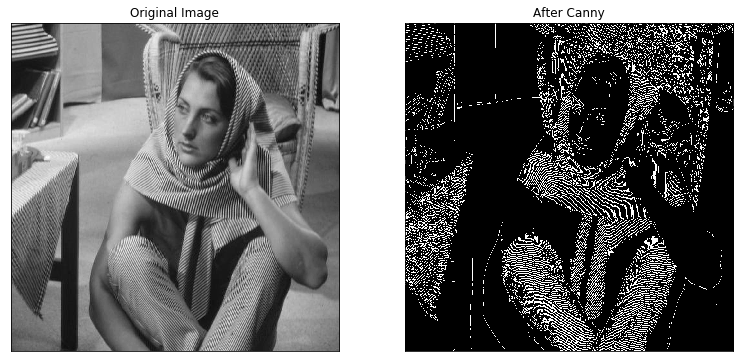

In [11]:
edges = cv2.Canny(image,50, 100)

plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('After Canny'), plt.xticks([]), plt.yticks([])

Canny edge detection is a multistage algorithm to detect a wide range of edges in images. Canny edge detector
produces higher accuracy in detection of object edges. Have to experiment with upper and lower thresholds.

In [12]:
image_gauss = noisy(image)
# image_gauss
# gauss_sobel = np.absolute(convolve2d(image_gauss.astype(np.float), sobel_h))
# gauss_robert = np.absolute(convolve2d(image_gauss.astype(np.float), roberts_h))
# gauss_prewitt = np.absolute(convolve2d(image_gauss.astype(np.float), prewitt_h))

# plt.figure(figsize=(20,20))
# plt.subplot(131),plt.imshow(gauss_sobel,cmap = 'gray')
# plt.title('Sobel'), plt.xticks([]), plt.yticks([])
# plt.subplot(132),plt.imshow(gauss_robert,cmap = 'gray')
# plt.title('Robert'), plt.xticks([]), plt.yticks([])
# plt.subplot(133),plt.imshow(gauss_prewitt,cmap = 'gray')
# plt.title('Prewitt'), plt.xticks([]), plt.yticks([])
# plt.show()

In [13]:
# gauss_sobel = np.absolute(convolve2d(image_gauss.astype(np.float), sobel_v))
# gauss_robert = np.absolute(convolve2d(image_gauss.astype(np.float), roberts_v))
# gauss_prewitt = np.absolute(convolve2d(image_gauss.astype(np.float), prewitt_v))

# plt.figure(figsize=(20,20))
# plt.subplot(131),plt.imshow(gauss_sobel,cmap = 'gray')
# plt.title('Sobel'), plt.xticks([]), plt.yticks([])
# plt.subplot(132),plt.imshow(gauss_robert,cmap = 'gray')
# plt.title('Robert'), plt.xticks([]), plt.yticks([])
# plt.subplot(133),plt.imshow(gauss_prewitt,cmap = 'gray')
# plt.title('Prewitt'), plt.xticks([]), plt.yticks([])

Disadvantages of Robert are that since it uses such a small kernel, it is very sensitive to noise. It also produces very weak responses to genuine edges unless they are very sharp. The Sobel and Prewitt operator performs much better in this respect. 

## Question 2

![title](input_data/q2.jpg)

## Question 3

### Part 1

In [14]:
box = plt.imread("input_data/box.png")
box_kernel = np.asarray([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

box = cv2.cvtColor(box, cv2.COLOR_BGR2GRAY)
resultant = convolve2d(box, box_kernel)


plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(box,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(resultant,cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])
plt.show()

### Part 2

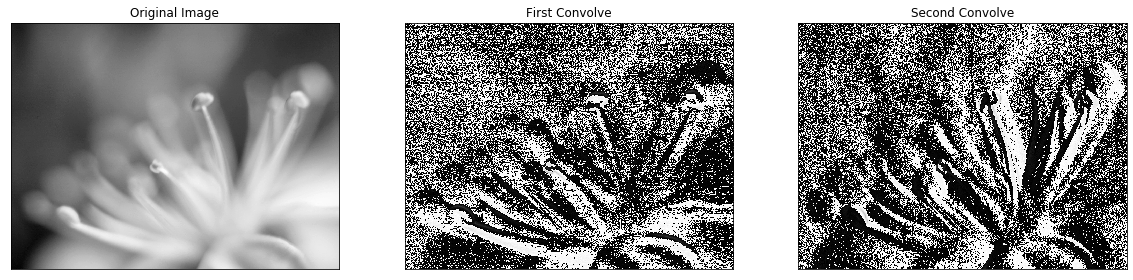

In [15]:
q32 = cv2.imread("input_data/blur.jpg")
q32 = cv2.cvtColor(q32, cv2.COLOR_BGR2GRAY)

first_convolve = np.absolute(convolve2d(q32, box_kernel))
second_convolve = np.absolute(convolve2d(q32, box_kernel.T))

fig = plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(q32, cmap="gray")
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(first_convolve, cmap="gray")
plt.title('First Convolve'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(second_convolve,cmap="gray")
plt.title('Second Convolve'), plt.xticks([]), plt.yticks([])
plt.show()

### Part 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


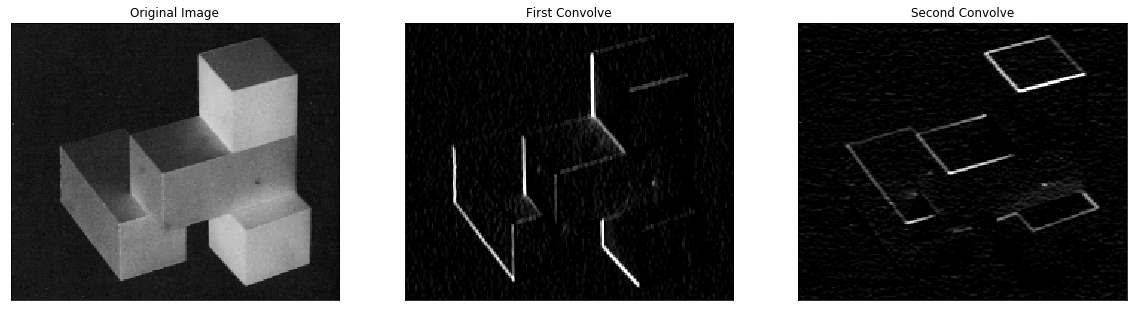

In [16]:
q33 = plt.imread("input_data/cubes.png")
# q32 = cv2.cvtColor(q32, cv2.COLOR_BGR2GRAY)

first_convolveB = convolve2d(q33.T[2], box_kernel)
first_convolveG = convolve2d(q33.T[1], box_kernel)
first_convolveR = convolve2d(q33.T[0], box_kernel)

first_convolve = np.dstack((first_convolveR.T, first_convolveG.T, first_convolveB.T))
second_convolveR = convolve2d(q33.T[2], box_kernel.T)
second_convolveG = convolve2d(q33.T[1], box_kernel.T)
second_convolveB = convolve2d(q33.T[0], box_kernel.T)

second_convolve = np.dstack((second_convolveR.T, second_convolveG.T, second_convolveB.T))

plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(q33,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(first_convolve,cmap = 'gray')
plt.title('First Convolve'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(second_convolve,cmap = 'gray')
plt.title('Second Convolve'), plt.xticks([]), plt.yticks([])
plt.show()

##### If observed carefully, first convolve emphasizes horizontal differences, while the second one emphasizes vertical differences and depending on the kernel taken, it can be the other way around.

----------------------------
## Question 4

### Part 1

High frequencies are magnified, without eliminating low frequency components representing the basic form of the signal. The image appears more enhanced and features like borders etc are more emphasized.

Low spatial frequency components (background, etc) are supressed.

Essentially, as per slides given in class, 

`HIGHBOOST = (A-1)ORIGINAL + ORIGINAL - LOWPASS`

where LOWPASS is a simple averaging filter.

[[[161 161 161]
  [161 161 161]
  [162 162 162]
  ...
  [174 169 162]
  [175 169 163]
  [175 170 164]]

 [[161 161 161]
  [161 161 161]
  [162 162 162]
  ...
  [174 168 162]
  [175 169 163]
  [175 169 163]]

 [[161 161 161]
  [161 161 161]
  [161 161 161]
  ...
  [174 168 161]
  [174 168 162]
  [174 168 162]]

 ...

 [[ 89  81  72]
  [ 88  80  71]
  [ 86  77  67]
  ...
  [209 206 203]
  [209 206 204]
  [209 206 204]]

 [[ 89  81  72]
  [ 88  80  71]
  [ 86  77  68]
  ...
  [209 206 203]
  [209 206 203]
  [209 206 203]]

 [[ 89  81  72]
  [ 88  80  71]
  [ 86  77  68]
  ...
  [209 206 203]
  [209 206 203]
  [209 206 203]]]


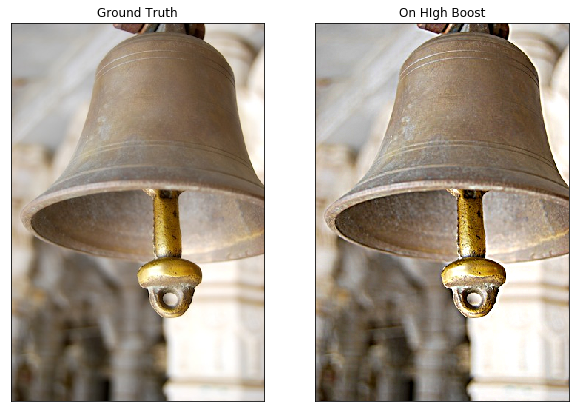

In [17]:
# def highBoost(image, k):
image = cv2.imread("input_data/bell.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

k = 9
rows, cols = (k, k) 
kernel = np.asarray([[1]*cols]*rows) 
kernel = kernel / (k*k)
image_padded = np.pad(image, int(k/2), 'constant').astype("float")
mean_imageB = convolve2d(image.T[0], kernel)
mean_imageG = convolve2d(image.T[1], kernel)
mean_imageR = convolve2d(image.T[2], kernel)
mean_image = np.dstack((mean_imageR.T, mean_imageG.T, mean_imageB.T))

resultant = image - mean_image
img = np.divide(( resultant - np.amin(resultant)), ( np.amax(resultant) - np.amin(resultant) ))

k = 2
sharpie = np.zeros_like(image.shape)
sharpie = img + (resultant*k)

sharpie = sharpie.astype("uint8")

gauss_mask = cv2.GaussianBlur(image, (9, 9), 10.0)
print(gauss_mask)
sharpie = cv2.addWeighted(image, 2, gauss_mask, -1, 0)

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Ground Truth'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sharpie,cmap = 'gray')
plt.title('On HIgh Boost'), plt.xticks([]), plt.yticks([])
plt.show()

### Part 2

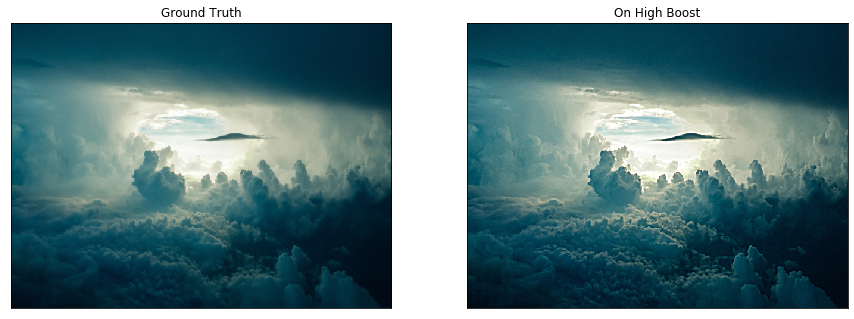

In [18]:
# def highBoost(image, k):
image = cv2.imread("input_data/gt_sky.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

k = 9
rows, cols = (k, k) 
kernel = np.asarray([[1]*cols]*rows) 
kernel = kernel / (k*k)
image_padded = np.pad(image, int(k/2), 'constant').astype("float")
mean_imageB = convolve2d(image.T[0], kernel)
mean_imageG = convolve2d(image.T[1], kernel)
mean_imageR = convolve2d(image.T[2], kernel)
mean_image = np.dstack((mean_imageR.T, mean_imageG.T, mean_imageB.T))

resultant = image - mean_image
# img = np.divide(( resultant - np.amin(resultant)), ( np.amax(resultant) - np.amin(resultant) ))

k = 2
sharpie = np.zeros_like(image.shape)
# sharpie = img + (resultant*k)

sharpie = sharpie.astype("uint8")

gauss_mask = cv2.GaussianBlur(image, (9, 9), 10.0)
# print(gauss_mask)
sharpie = cv2.addWeighted(image, 2, gauss_mask, -1, 0)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Ground Truth'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sharpie,cmap = 'gray')
plt.title('On High Boost'), plt.xticks([]), plt.yticks([])
plt.show()

### Part 3

#### Bilateral filtering:

###### Regions of intensity discontinuity are not smoothed.

#### High boost filtering:

###### The intensity of regions of intensity discontinuity is enhanced.

----------------------------

## Question 5

Convolve2D function is called at the beginning of the notebook so that it can be utilized for other questions. This is further improved upon, for averaging filters below.

### Part 1

In [19]:
image = cv2.imread("input_data/barbara.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
k = 3
rows, cols = (k, k) 
kernel = np.asarray([[1]*cols]*rows) 
kernel = kernel / (k*k)

#### Built-in

In [20]:
start = time.process_time()

print(signal.convolve2d(image, kernel, mode='same').astype("uint8"))

print(time.process_time() - start)

[[ 43  65  65 ...  72  75  51]
 [ 65  98  99 ... 112 115  78]
 [ 67 102 103 ... 119 121  82]
 ...
 [ 57  85  83 ... 104 103  69]
 [ 57  85  84 ... 103 102  68]
 [ 38  57  56 ...  69  68  45]]
0.060175777000011976


#### Algorithm Developed

In [21]:
start = time.process_time()

print(convolve2d(image,kernel))

print(time.process_time() - start)

[[ 43  65  65 ...  72  75  51]
 [ 65  98  99 ... 112 115  78]
 [ 67 102 103 ... 119 121  82]
 ...
 [ 57  85  83 ... 104 103  69]
 [ 57  85  84 ... 103 102  68]
 [ 38  57  56 ...  69  68  45]]
8.214536828999996


### Part 2

In [22]:
def convolve2d_fastly(image, kernel):
    output = np.zeros_like(image).astype("float")
    # [1 1 1] [0 0 0] [-1 -1 -1]
    k = kernel.shape[0]
    image = image.astype("float")
    image_padded = np.pad(image, int(k/2), 'constant').astype("float")
    
    for row in range(image.shape[0]):
        for column in range(image.shape[1]):
            if column>0:
                image_padded_add = image_padded[row:row+k, column+k-1]
                image_padded_subtract = image_padded[row:row + k, column-1]
                output[row, column] = output[row,column-1] + (np.multiply(kernel[:, -1], image_padded_add)).sum() - (np.multiply(kernel[:,0], image_padded_subtract)).sum()
            elif row>0:
                image_padded_add = image_padded[row+k-1, column:column+k]
                image_padded_subtract = image_padded[row-1, column:column+k]
                output[row, column] = output[row-1,column] + np.multiply(kernel[-1, :], image_padded_add).sum() - np.multiply(kernel[0, :], image_padded_subtract).sum()
            else:
                output[row,column] = np.multiply(kernel, image_padded[row:row + k, column:column + k]).sum()
                
    return output.astype("uint8")

In [23]:
start = time.process_time()
print(convolve2d_fastly(image,kernel))
print(time.process_time() - start)

[[ 43  65  65 ...  72  75  51]
 [ 65  98  99 ... 112 115  78]
 [ 67 102 103 ... 119 121  82]
 ...
 [ 56  84  83 ... 104 103  69]
 [ 57  85  84 ... 103 102  68]
 [ 38  57  56 ...  68  68  45]]
14.972212022999997


## Used combination of images including 1024x1024, 480x640 etc
![title](input_data/output1-Copy1.png)

In [24]:
# images = [(cv2.imread("input_data/noir.png", 0)), (cv2.imread("input_data/barbara.jpg", 0)), (cv2.imread("input_data/Clear.jpg", 0))]
# image = images[0]
# for k in range(1,201,16):
#     x_slow.append(k)
#     x_fast.append(k)
#     rows, cols = (k, k) 
#     kernel = np.asarray([[1]*cols]*rows) 
#     kernel = kernel / (k*k)

#     start = time.process_time()
#     convolve2d(image,kernel)
#     y_slow.append(time.process_time() - start)

#     start = time.process_time()
#     convolve2d_fastly(image,kernel)
#     y_fast.append(time.process_time() - start)
    


### Part 3

#### Median Filter

In [25]:
def median_filter(image, window):
#     result = np.zeros(image.shape)  # create new image 
    image = image.T
    images = [image[0], image[1], image[2]]
    result = []
#     b_result = median_filter(image[0], 5)
#     g_result = median_filter(image[1], 5)
#     r_result = median_filter(image[2], 5)
    for img in images:
        image = np.pad(img, int((window-1)/2), 'constant')

        size = int((window-1)/2)
        imagecopy = image.copy()
        arr = []
        for i in range(size,image.shape[0]-size):
            for j in range(size, image.shape[1] - size):

                for k in range(-size, size + 1):
                    for l in range(-size, size + 1):
                        arr.append(image[i+k][j+l])

                imagecopy[i][j] = int(np.median(arr))
                arr.clear()
        result.append(imagecopy)
    
    final_res = np.dstack((imagecopy[2].T,imagecopy[1].T,imagecopy[0].T))
    return final_res

#### Efficient Median Filtering

In [35]:
def fast_median(histogram, flag, p,r, I, F):
    if flag == 'r':
        for i in range(p[0]-r, p[0]+r+1):
            f,iv = F[i][p[1]-r], I[i][p[1]-r]
            histogram[f][iv] -= 1
        for j in range(p[1]-r, p[1]+r+1):
            f,iv = F[p[0]-r][j],I[p[0]-r][j]
            histogram[f][iv] += 1
    histogram = np.zeros((histogram.shape[0],histogram.shape[1]))
    if flag == 'd':
        for i in range(p[0]-r, p[0]+r+1):
            for j in range(2 * r + 1):
                if (i, j) != p:
                    f = F[i][j]
                    in_ = I[i][j]
                    histogram[f][in_] += 1
    return histogram    

Efficient Median Filtering or Fast Median Filtering involves usage of histogram of sub-window used, for easy acces to sort the values and get the median.

-----------------------------

## Question 6
### Bilateral Filtering

#### Part 1

![title](input_data/bilateral_filter.png)

In [26]:
# REFER TO EXPLANATION VID : https://www.youtube.com/watch?v=RpuYTPpUgEA
def bilateral_filtering(image, window, sigma_r, sigma_d):
    result = np.zeros(image.shape)  # create new image 
    image = np.pad(image, int((window-1)/2), 'constant')
    
    size = int((window-1)/2)
    
    # Gaussian size
    X, Y = np.meshgrid(range(-size, size + 1), range(-size, size + 1))
    numerator = (X ** 2 + Y ** 2)
    g_exponent = np.exp(-numerator/(2 * sigma_d ** 2))    # spatial differences
    
    for i in range(size, image.shape[0] - size):
        for j in range(size, image.shape[1] - size):
            im_window = image[i - size:i + size + 1, j - size:j + size + 1]
            im_exponent = np.exp(-((im_window - image[i, j]) ** 2)/(2 * (sigma_r ** 2)))  # intensity differences
            b_filt = np.multiply(im_exponent, g_exponent)
            
            b_filt = b_filt / np.sum(b_filt)
                                           
            result[i-size, j-size] = np.sum(np.multiply(b_filt, im_window))
            
    return result

#### Part 2

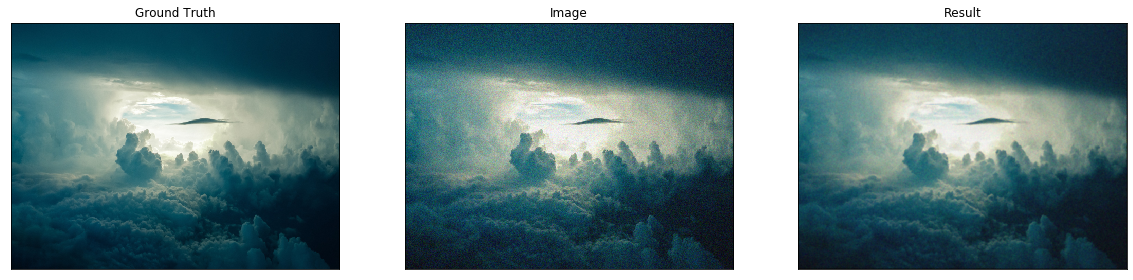

In [27]:
gt_image = cv2.imread("input_data/gt_sky.png")
gt_image = cv2.cvtColor(gt_image, cv2.COLOR_BGR2RGB)
image = cv2.imread("input_data/sky.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# result = bilateral_filtering(image, 3, 20, 200)
resultR = bilateral_filtering(image.T[0], 3, 10, 30)
resultG = bilateral_filtering(image.T[1], 3, 20, 50)
resultB = bilateral_filtering(image.T[2], 5, 10, 30)


result = np.dstack((resultR.T,resultG.T,resultB.T))
l2_dist = np.linalg.norm(result-gt_image)

plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(gt_image)
plt.title('Ground Truth'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(image)
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(result.astype("uint8"))
plt.title('Result'), plt.xticks([]), plt.yticks([])
plt.show()

### Sigma values: 

> Sigma_r = 10

> Sigma_d = 30

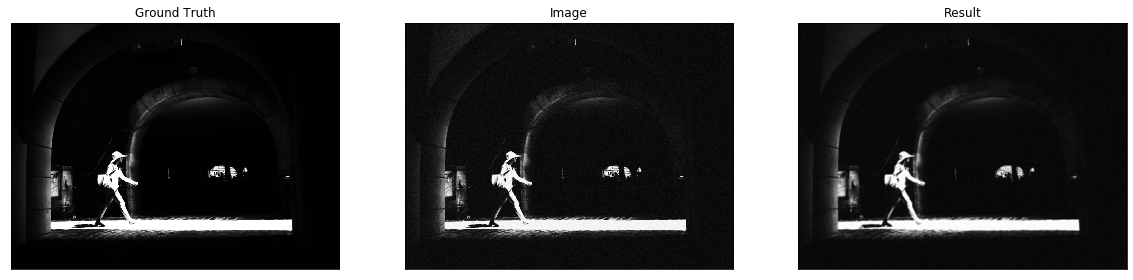

In [28]:
gt_image = cv2.imread("input_data/gt_noir.png")
gt_image = cv2.cvtColor(gt_image, cv2.COLOR_BGR2GRAY)
image = cv2.imread("input_data/noir.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
result = bilateral_filtering(image, 3, 35, 100)

l2_dist = np.linalg.norm(result-gt_image)

plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(gt_image,cmap = 'gray')
plt.title('Ground Truth'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(image,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(result,cmap = 'gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])
plt.show()

As you can see, the edges are preserved but the homogenous areas have been cleaned up.

### Sigma values: 

> Sigma_r = 35

> Sigma_d = 100


As the value of sigma_r increases, the filter's Variance increases and hence the bilateral filter approaches a Gaussian filter. 

When the variance is low, the weights drop quickly as color intensity difference increases.

As the value of sigma_d increases, the smoothing Gaussian filter becomes flatter and p
ixels which are distant get higher weights. Thus, the smoothing happens over a larger area.


## Question 7
### Part 1

#### Cross Bilateral Filter

In [29]:
# REFER TO EXPLANATION VID : https://www.youtube.com/watch?v=RpuYTPpUgEA
def crossBilateral_filtering(no_flash, flash, window, sigma_r, sigma_d):
    result = np.zeros(no_flash.shape)  # create new image 
    flash_pad = np.pad(flash, int((window-1)/2), 'constant')
    no_flash_pad =  np.pad(no_flash, int((window-1)/2), 'constant')
    
    size = int((window-1)/2)
    
    # Gaussian size
    X, Y = np.meshgrid(range(-size, size + 1), range(-size, size + 1))
    numerator = (X ** 2 + Y ** 2)
    g_exponent = np.exp(-numerator/(2 * sigma_d ** 2))    # spatial differences
    
    for i in range(size, flash_pad.shape[0] - size):
        for j in range(size, flash_pad.shape[1] - size):
            im_window = flash_pad[i - size:i + size + 1, j - size:j + size + 1]
            to_multiply = no_flash_pad[i - size:i + size + 1, j - size:j + size + 1]
            im_exponent = np.exp(-((im_window - flash_pad[i, j]) ** 2)/(2 * (sigma_r ** 2)))  # intensity differences
            b_filt = np.multiply(im_exponent, g_exponent)
            
            b_filt = b_filt / np.sum(b_filt)
                                           
            result[i-size, j-size] = np.sum(np.multiply(b_filt, to_multiply))
            
    return result

In [30]:
no_flash = cv2.imread('input_data/pots_no_flash.jpg') #read in images in colour
flash = cv2.imread('input_data/pots_flash.jpg')

# no_flash = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# flash = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

resultR = crossBilateral_filtering(no_flash.T[2], flash.T[2], 9, 3, 20)
resultG = crossBilateral_filtering(no_flash.T[1], flash.T[1], 9, 3, 20)
resultB = crossBilateral_filtering(no_flash.T[0], flash.T[0], 9, 3, 20)

result = np.dstack((resultR.T,resultG.T,resultB.T))
result = result.astype("uint8")
no_flash = cv2.cvtColor(no_flash, cv2.COLOR_BGR2RGB)
flash = cv2.cvtColor(flash, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(no_flash)
plt.title('No Flash'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(flash)
plt.title('Flash'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(result)
plt.title('Intended'), plt.xticks([]), plt.yticks([])
plt.show()


### Part 2
#### Inverse Bilateral Filter

In [31]:
# REFER TO EXPLANATION VID : https://www.youtube.com/watch?v=RpuYTPpUgEA
def inverseBilateral_filtering(image, window, sigma_r, sigma_d):
    result = np.zeros(image.shape)  # create new image 
    image = np.pad(image, int((window-1)/2), 'constant')
    
    size = int((window-1)/2)
    
    # Gaussian size
    X, Y = np.meshgrid(range(-size, size + 1), range(-size, size + 1))
    numerator = (X ** 2 + Y ** 2)
    g_exponent = np.exp(-numerator/(2 * sigma_d ** 2))    # spatial differences
    
    for i in range(size, image.shape[0] - size):
        for j in range(size, image.shape[1] - size):
            im_window = image[i - size:i + size + 1, j - size:j + size + 1]
            im_exponent = np.exp(-(-256**2 + (im_window - image[i, j]) ** 2)/(2 * (sigma_r ** 2)))  # intensity differences
            b_filt = np.multiply(im_exponent, g_exponent)
            
            b_filt = b_filt / np.sum(b_filt)
                                           
            result[i-size, j-size] = np.sum(np.multiply(b_filt, im_window))
            
    return result

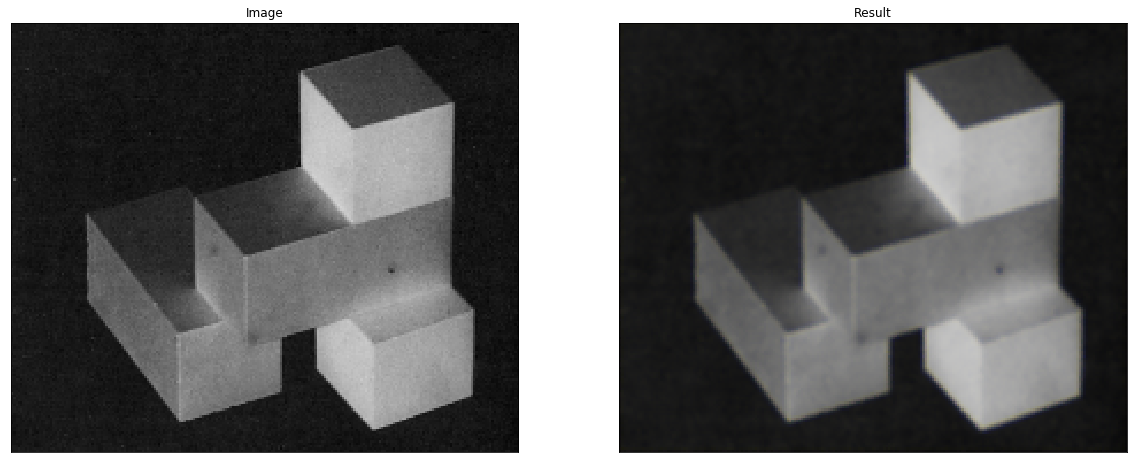

In [32]:
image = cv2.imread("input_data/cubes.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# result = bilateral_filtering(image, 3, 20, 200)
resultR = inverseBilateral_filtering(image.T[0], 3, 10, 30)
resultG = inverseBilateral_filtering(image.T[1], 3, 20, 50)
resultB = inverseBilateral_filtering(image.T[2], 5, 10, 30)


result = np.dstack((resultR.T,resultG.T,resultB.T))
# l2_dist = np.linalg.norm(result-gt_image)

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(image)
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result.astype("uint8"))
plt.title('Result'), plt.xticks([]), plt.yticks([])
plt.show()

In bilateral, lesser weights is given to pixels further away, thereby reducing blurring of edges.
However it is possible to blur edges while simultaneously preserving homogeneous intensities.

 - One possible way almost demonstrated above, is modifying the bilateral filter such that the negative of the range filter for intensities is taken.

 -256 + |I1 - I2|^2  
 => Contrast, and thus higher the contrast more the blurring of edges.

 - Another possible way is to take the edge mask of the image, dilute/blur it and use it as a mask for the original. Only the edges will be affected.

## Question 8

In [33]:
def median_filter(image, window):
#     result = np.zeros(image.shape)  # create new image 
    image = image.T
    images = [image[0], image[1], image[2]]
    result = []
#     b_result = median_filter(image[0], 5)
#     g_result = median_filter(image[1], 5)
#     r_result = median_filter(image[2], 5)
    for img in images:
        image = np.pad(img, int((window-1)/2), 'constant')

        size = int((window-1)/2)
        imagecopy = image.copy()
        arr = []
        for i in range(size,image.shape[0]-size):
            for j in range(size, image.shape[1] - size):

                for k in range(-size, size + 1):
                    for l in range(-size, size + 1):
                        arr.append(image[i+k][j+l])

                imagecopy[i][j] = int(np.median(arr))
                arr.clear()
        result.append(imagecopy)
    
    final_res = np.dstack((imagecopy[2].T,imagecopy[1].T,imagecopy[0].T))
    return final_res

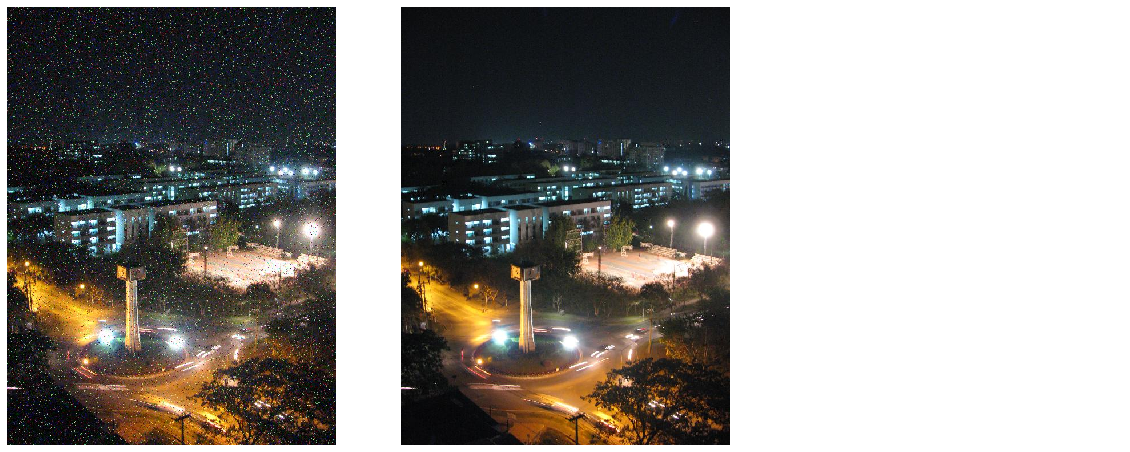

In [34]:
img = cv2.imread("input_data/Degraded.jpg")
og = cv2.imread("input_data/Clear.jpg")

dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)


resultR = bilateral_filtering(dst.T[2], 9, 75, 75)
resultG = bilateral_filtering(dst.T[1], 9, 75, 75)
resultB = bilateral_filtering(dst.T[0], 9, 75, 75)

result = np.dstack((resultR.T,resultG.T,resultB.T))
dst = result.astype("uint8")

# dst = bilateral_filtering(dst,9,75,75)     # clear points without changing edges
# dst = cv2.medianBlur(dst, 3)               # clear noise
dst = median_filter(dst, 3)
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])

mean_imageB = convolve2d(dst.T[2], kernel)
mean_imageG = convolve2d(dst.T[1], kernel)
mean_imageR = convolve2d(dst.T[0], kernel)
mean_image = np.dstack((mean_imageR.T, mean_imageG.T, mean_imageB.T))

# dst = convolve2d(dst, kernel)        # sharpen edges, enhance image

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
og = cv2.cvtColor(og, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img)
plt.axis("off")
plt.subplot(132),plt.imshow(og)
plt.axis("off")
plt.subplot(133),plt.imshow(dst)
plt.axis("off")
plt.show()

- Used a combination of bilateral filtering and median filter which are implemented above, to get rid of Gaussian noise present in the image.

- Utilized a sharpening kernel to emphasize edges which have been blurred when median filter was implemented. Convolved with the convolove 2D function implemented above 

- Converted back to RGB and displayed the output